## 单层网络分层

第三周作业。本次是创建你的第一个神经网络，它只包含了一个隐藏层，你将发现这里的实现跟逻辑回归有非常大的区别。你讲学习到怎样:

- 实现一个二分单层神经网络
- 使用一个非线性激活函数，比如tanh
- 计算交叉熵损失
- 实现前馈和后馈

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)



In [3]:
X, Y = load_planar_dataset()

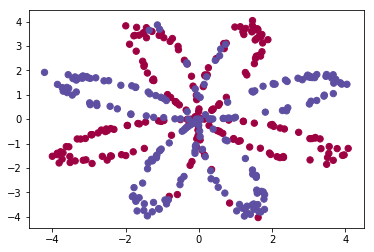

In [4]:
plt.scatter(X[0,:],X[1, :],c=Y, s=40,cmap=plt.cm.Spectral);

In [6]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]

print("The shape of X is:{}".format(shape_X))
print("The shape of Y is:{}".format(shape_Y))
print("I have m ={}".format(m))

The shape of X is:(2, 400)
The shape of Y is:(1, 400)
I have m =400


上一个cell中，获取了X的shape和Y的shap

### 简单的逻辑回归
在开始一个完整的神经网络之前，我们先来使用逻辑回归来解决这个问题。你可以使用sklearn的内建函数来完成，运行下面的代码，用逻辑回归分类器类完成数据分类。

In [7]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

accuracy of logistic regression:47.0% 


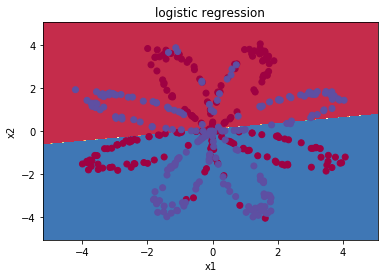

In [9]:
plot_decision_boundary(lambda x: clf.predict(x),X, Y)
plt.title("logistic regression")

LR_predictions = clf.predict(X.T)
print("accuracy of logistic regression:{}% ".format(float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100)))

### 神经网络模型
对于花形的数据，逻辑回归的效果并不理想。你将开始训练一个单隐藏层神经网络。
如下图所示:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">
#####提示:
建立一个神经网络的基本步骤为:
1. 定义神经网络的结构
2. 初始化模型参数
3. 循环:
    - 实现前馈
    - 计算损失
    - 实现后馈来获得梯度
    - 更新参数

你会经常创建一个函数来计算1-3步，然后将他们合成在一个我们称之为nn_model()的函数里面。一旦你成功创建了nn_model()函数并且学习到了正确的参数，你就可以来预测一组新的数据了。

#### 设计神经网络
设计如下几个变量:
- n_x: 输入层的数量
- n_h：隐藏层的数量
- n_y: 输出层的数量

In [10]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 4
    
    return (n_x, n_h, n_y)

In [16]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of input layer is:{}".format(n_x))
print("The size of hidden layer is:{}".format(n_h))
print("The size of output layer is:{}".format(n_y))

The size of input layer is:5
The size of hidden layer is:4
The size of output layer is:2


In [17]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2}
    return parameters
    

In [19]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = {}".format(parameters["W1"]))
print("b1 = {}".format(parameters["b1"]))
print("W2 = {}".format(parameters["W2"]))
print("b2 = {}".format(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[ 0.]]
